# Regressão Linear Rigde e Lasso



A tarefa da regressão linear é de estimar os valores para os coeficientes do modelo, ŵᵢ e b^.
Eles dão ao moledo o melhor ajuste dos dados de treinamento com o menor erro quadrado.

O método de regressão linear atua estimando os pesos w das características, os quais são chamados de coeficientes do modelo, e armazena isso no atributo coeff_, ou seja, em linreg.coef_ e o termo de viés, b, que é armazenado no atributo intercept_, em linreg.intercept_. Observe que, se um atributo de um objeto do Scikit-Learn termina com um sublinhado, isso significa que esses atributos foram derivados de dados de treinamento, e que não são quantidades que foram definidas pelo usuário.







* Regressão Linerar: é o processo de estimar uma linha reta que tenta preve uma saida  a partir de atributos de entrada. 


> Regularização é um conceito extremamente importante em aprendizado de máquina. É uma forma de evitar sobreajuste e, portanto, de melhorar a chance de bom desempenho de generalização de um modelo, restringindo as possíveis configurações dos parâmetros dos modelos. Geralmente o efeito desta restrição, devido à regularização, é reduzir a complexidade do modelo final estimado. Em outras palavras, mantendo tudo mais constante.



> A intensidade de regularização a ser aplicada é controlada pelo parâmetro alfa. Alfa maior significa mais regularização e modelos lineares mais simples e com pesos mais próximos de zero. O valor padrão para alfa é 1,0. Observe que fazer alfa igual a zero corresponde ao caso especial de regressão linear de mínimos quadrados ordinários
   

* Regressão Linear Ridge: Regularização L2

    - Tem como objetivo reduzir a magnetude dos parâmetros, com o objetivo de evitar colinearidade. 

    - Reduz a complexidade do modelo pelo encolhimento do coeficiente.

    

* Regressão Linear Lasso: Regularização L1
  
    - Tenta zerar parâmetros que estão contribuindo pouco ao invés de simplesmente reduzir a magnitude como a L2 faz. 
    - Feature Selection: Aproxima parâmetros que pouco contribuem do zero absoluto. 
    - Ideal ser utilizada para grande quantidade de atributos. 
    - Pode ser usada em pré-processamento para entender os dados. 
    





In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import numpy as np
import matplotlib.pyplot as plt

boston = load_boston()

X = boston.data
y = boston.target

print("Número de atributos originais: ", X.shape)



Número de atributos originais:  (506, 13)


In [2]:
# O PolynomialFeatures aumenta a dimensão dos dados produzindo novos atributos 
# que são combinações lineares dos dados originais.

X  = MinMaxScaler().fit_transform(boston.data)

X = PolynomialFeatures(degree=2,include_bias=False).fit_transform(X)


print("Polinomial Features Atributos Redundantes: ", X.shape)




Polinomial Features Atributos Redundantes:  (506, 104)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Regressão Linear

In [4]:
linreg = LinearRegression().fit(X_train, y_train)

print("LinearRegression")
print("Acurácia treinamento: {:.2f}".format(linreg.score(X_train,y_train)))
print("Acurácia de testes: {:.2f}".format(linreg.score(X_train,y_train)))
print('LinearRegression coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

LinearRegression
Acurácia treinamento: 0.95
Acurácia de testes: 0.95
LinearRegression coeff (w): [-4.12710947e+02 -5.22432068e+01 -1.31898815e+02 -1.20041365e+01
 -1.55107129e+01  2.87163342e+01  5.47040992e+01 -4.95346659e+01
  2.65823927e+01  3.70620316e+01 -1.18281674e+01 -1.80581965e+01
 -1.95246830e+01  1.22025403e+01  2.98078144e+03  1.50084257e+03
  1.14187325e+02 -1.69700520e+01  4.09613691e+01 -2.42636646e+01
  5.76157466e+01  1.27812142e+03 -2.23986944e+03  2.22825472e+02
 -2.18201083e+00  4.29960320e+01 -1.33981515e+01 -1.93893485e+01
 -2.57541277e+00 -8.10130128e+01  9.66019367e+00  4.91423718e+00
 -8.12114800e-01 -7.64694179e+00  3.37837099e+01 -1.14464390e+01
  6.85083979e+01 -1.73753604e+01  4.28128204e+01  1.13988209e+00
 -7.72696840e-01  5.68255921e+01  1.42875996e+01  5.39551110e+01
 -3.21709644e+01  1.92709675e+01 -1.38852338e+01  6.06343266e+01
 -1.23153942e+01 -1.20041365e+01 -1.77243899e+01 -3.39868183e+01
  7.08999816e+00 -9.22538241e+00  1.71980268e+01 -1.277184

### Regressão Linear Ridge
#### Regularização L2

Força uma redução dos coeficientes, penalizando coeficientes grandes que não contribuem significativamente para a explicação da variância do sinal.  

> A força da regularização é dada pelo atributo alpha.

In [5]:
# Alpha = 1


ridge1 = Ridge().fit(X_train,y_train)

print("Ridge alpha=1")
print("Acurácia treinamento: {:.2f}".format(ridge1.score(X_train,y_train)))
print("Acurácia de testes: {:.2f}".format(ridge1.score(X_train,y_train)))
print('ridge1 coeff (w): {}'.format(ridge1.coef_))
print('ridge1 intercept (b): {:.3f}'.format(ridge1.intercept_))
print('R-squared score (training): {:.3f}'.format(ridge1.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(ridge1.score(X_test, y_test)))

Ridge alpha=1
Acurácia treinamento: 0.89
Acurácia de testes: 0.89
ridge1 coeff (w): [-1.41368408e+00 -1.55661895e+00 -1.46543409e+00 -1.26616071e-01
 -7.91193605e-02  8.33161023e+00  2.54975060e-01 -4.94145701e+00
  3.89862268e+00 -1.05866058e+00 -1.58433734e+00  1.05103856e+00
 -4.01220799e+00  3.33720475e-01  3.64725471e-03 -8.49295793e-01
  7.44989267e-01 -1.43106836e+00 -1.62981017e+00 -1.40486294e+00
 -4.47314366e-02 -1.74619880e+00 -1.46715888e+00 -1.33237111e+00
 -1.69154625e+00 -5.06179637e-01  2.62197591e+00 -2.09210002e+00
  1.95074661e-01 -2.75469422e-01  5.11308202e+00 -1.67083739e+00
 -9.81863179e-02  6.34477127e-01 -6.10008281e-01  4.01805897e-02
 -1.27661999e+00 -2.91349679e+00  3.39544035e+00  7.91904036e-01
  1.35260232e+00 -4.03661265e+00  2.32361734e+00 -3.36712926e+00
  1.81279204e+00  3.01566897e+00 -1.89452070e+00 -2.50844073e-01
 -2.89543735e+00 -1.26616071e-01 -5.00217192e+00 -2.43951806e+00
  2.85071846e+00 -8.57081177e-01  2.99141960e+00  2.34589755e+00
  1.31

In [6]:
# Alpha = 0.1

ridge01 = Ridge(alpha=0.001).fit(X_train,y_train)

print("Ridge alpha=0.001")
print("Acurácia treinamento: {:.2f}".format(ridge01.score(X_train,y_train)))
print("Acurácia de testes: {:.2f}".format(ridge01.score(X_train,y_train)))
print('ridge01 coeff (w): {}'.format(ridge01.coef_))
print('ridge01 intercept (b): {:.3f}'.format(ridge01.intercept_))
print('R-squared score (training): {:.3f}'.format(ridge01.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(ridge01.score(X_test, y_test)))

Ridge alpha=0.001
Acurácia treinamento: 0.95
Acurácia de testes: 0.95
ridge01 coeff (w): [-8.24839647e+00 -2.28314057e+01 -7.89613558e+01 -1.30811000e+01
 -9.11946977e+00  3.64396955e+01  4.94032184e+01 -3.53172321e+01
  3.13586225e+01 -9.34346460e-01 -2.45951765e+00  5.53240721e+00
 -1.30090271e+01  1.03887956e+01  3.77963421e+00  1.47830860e+01
  8.88923932e+01 -1.76906885e+01  3.37597839e+01 -2.55917380e+01
  1.69940386e+01 -9.97296508e+00  1.71091802e-01 -1.20293044e+01
 -1.99875385e+00  3.33066880e+01 -7.66363830e+00 -1.37985946e+01
 -8.78409877e-01 -4.95109896e+01  7.20273867e+00  1.91073862e+00
 -7.23969674e+00 -3.15009164e+00  2.69006587e+01 -5.40422843e+00
  3.32300528e+01 -1.29212720e+01  2.95177141e+01 -1.14096569e-01
  1.80690899e+01  4.67535128e+01  1.32621433e+01  4.33531259e+01
  1.96719604e+00  1.57449759e+01 -6.82228253e+00  1.40785985e+01
 -1.38512928e+01 -1.30811000e+01 -1.61395976e+01 -3.12716543e+01
  8.67645215e+00 -5.24161457e+00  1.14599468e+01 -5.60724760e+00
 

In [7]:
# Alpha = 10

ridge10 = Ridge(alpha=10).fit(X_train,y_train)

print("Ridge alpha=10")
print("Acurácia treinamento: {:.2f}".format(ridge10.score(X_train,y_train)))
print("Acurácia de testes: {:.2f}".format(ridge10.score(X_train,y_train)))
print('ridge10 coeff (w): {}'.format(ridge10.coef_))
print('ridge10 intercept (b): {:.3f}'.format(ridge10.intercept_))
print('R-squared score (training): {:.3f}'.format(ridge10.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(ridge10.score(X_test, y_test)))

Ridge alpha=10
Acurácia treinamento: 0.79
Acurácia de testes: 0.79
ridge10 coeff (w): [-8.11609631e-01  6.47608896e-01 -8.09783229e-01  3.11334709e-01
 -6.84623747e-01  4.38797575e+00 -1.47554474e-01 -2.44214065e+00
  8.45915099e-01 -1.14727508e+00 -2.33162040e+00  1.06787015e+00
 -3.98391025e+00 -5.98636976e-01  2.93228193e-03 -5.21253823e-01
  1.40339673e-01 -6.45256057e-01 -7.61400539e-01 -7.47231171e-01
 -3.86298005e-02 -8.29808059e-01 -7.52859756e-01 -6.75605899e-01
 -8.72001488e-01 -3.23330640e-01  1.27336327e+00 -3.37279550e-01
  6.30682038e-02  2.37092897e-01  2.09805607e+00  1.00996768e-01
 -2.79529662e-01  1.73222619e-01 -3.33557850e-01 -3.74226653e-01
  6.98414808e-01 -6.96284918e-01  7.79521010e-01  3.74843210e-01
 -6.24101244e-01 -7.63657605e-01  4.35756439e-02 -1.04000852e+00
  4.24401576e-01  4.78687021e-01 -3.84125445e-01 -9.93802653e-02
 -1.30226356e+00  3.11334709e-01 -5.92097637e-01  6.33816542e-01
  6.66792895e-01 -1.27959944e-01  1.35346930e+00  1.09839246e+00
  6.

## Regressão Linear Lasso
### Regularização L1 

Com a Regressão Lasso, um subconjunto dos coeficientes são forçados a ser precisamente zero. Que é um tipo de seleção automática de características, Dado que, tendo peso zero, as características são, por construção, completamente ignoradas no modelo. Esta solução esparsa onde apenas um subconjunto das características mais importantes são deixadas com pesos não-nulos, também torna o modelo mais fácil de interpretar. Em casos onde há um número considerável de variáveis de entrada. Assim com na Regressão Ridge, a intensidade de regularização para a Regressão LASSO é controlada pelo parâmetro alpha, que por padrão é 1.0. Também como na Regressão Ridge, a finalidade de usar Regressão LASSO é estimar os coeficientes "W" e "b" do modelo.


Em geral, a Regressão do LASSO é mais útil se você acha que existem apenas algumas variáveis que têm médio ou muito efeito sobre a variável de saída. Caso contrário, se existem muitas variáveis que contribuem com pequenos ou médios efeitos, Regressão Ridge é normalmente a melhor escolha. Vamos dar uma olhada na Regressão LASSO em scikit-learn usando o ambiente notebook, usando informações sobre crime como conjunto de dados de regressão. Para usar a Regressão LASSO, importa-se a classe de "Lasso" do "sklearn.linear_model", e então usa-se como você usaria um estimador para Regressão de Cume. Com alguns conjuntos de dados você pode, ocasionalmente, receber um aviso de convergência, nesse caso, você pode definir um valor maior para o atributo "max_iter".

In [8]:
# Alpha = 1

lasso1 = Lasso().fit(X_train,y_train)


print("Lasso alpha=1")
print("Acurácia treinamento: {:.2f}".format(lasso1.score(X_train,y_train)))
print("Acurácia de testes: {:.2f}".format(lasso1.score(X_train,y_train)))
print('lasso1 coeff (w): {}'.format(lasso1.coef_))
print('lasso1 intercept (b): {:.3f}'.format(lasso1.intercept_))
print('R-squared score (training): {:.3f}'.format(lasso1.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(lasso1.score(X_test, y_test)))
print("Número total de atributos: 104, Número de atributos usados: {}".format(np.sum(lasso1.coef_ != 0)))



#print('Features with non-zero weight (sorted by absolute magnitude):')

#for e in sorted (list(zip(list(X), lasso1.coef_)),
#                key = lambda e: -abs(e[1])):
#    if e[1] != 0:
#        print('\t{}, {:.3f}'.format(e[0], e[1]))


Lasso alpha=1
Acurácia treinamento: 0.29
Acurácia de testes: 0.29
lasso1 coeff (w): [-0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.         -0.          0.
 -5.3529079  -0.          0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
 -0.         -1.05063037 -3.3104274  -0.         -0.          0.
 -0.  

In [9]:
# Alpha = 0.1

lasso01 = Lasso(alpha=0.001,  max_iter = 20000).fit(X_train,y_train)


print("Lasso alpha=0.1")
print("Acurácia treinamento: {:.2f}".format(lasso01.score(X_train,y_train)))
print("Acurácia de testes: {:.2f}".format(lasso01.score(X_train,y_train)))
print('lasso01 coeff (w): {}'.format(lasso01.coef_))
print('lasso01 intercept (b): {:.3f}'.format(lasso01.intercept_))
print('R-squared score (training): {:.3f}'.format(lasso01.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(lasso01.score(X_test, y_test)))
print("Número total de atributos: 104, Número de atributos usados: {}".format(np.sum(lasso01.coef_ != 0)))



Lasso alpha=0.1
Acurácia treinamento: 0.94
Acurácia de testes: 0.94
lasso01 coeff (w): [ -0.          -1.70538694 -16.01872303  -7.19850649  -0.
  49.61003442  23.54698899  -2.04948056  11.49968653  -0.
   2.84196671  14.22308733  -0.           7.48541517   0.
  -0.          15.46929733  -0.           0.         -10.18831292
   0.          -7.31244152  -0.          -0.          -0.
  -0.           2.55774271  -0.           0.          -0.
   0.          -1.10688237  -1.79814212   0.           4.10204429
  -0.          -0.         -10.54729728  12.64301424   0.
  16.46380364  11.78599185   7.72580211   0.          12.6732543
   7.90847241 -12.66143695  -0.         -25.31465721  -3.81166111
 -14.32930882 -23.24376211   6.24980116  -0.           4.43897872
   6.7652082   -1.34990132  27.19791839 -12.40214727  -0.
  -0.          -9.44593051   0.         -14.91419257  -0.
  -0.35371886   0.           3.23655132  15.67950534 -30.85200039
   0.          -6.91806721 -27.02822578 -30.50139853  

In [10]:
# Alpha = 10

lasso10 = Lasso(alpha=10).fit(X_train,y_train)


print("Lasso alpha=10")
print("Acurácia treinamento: {:.2f}".format(lasso10.score(X_train,y_train)))
print("Acurácia de testes: {:.2f}".format(lasso10.score(X_train,y_train)))
print('lasso10 coeff (w): {}'.format(lasso10.coef_))
print('lasso10 intercept (b): {:.3f}'.format(lasso10.intercept_))
print('R-squared score (training): {:.3f}'.format(lasso10.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(lasso10.score(X_test, y_test)))
print("Número total de atributos: 104, Número de atributos usados: {}".format(np.sum(lasso10.coef_ != 0)))

Lasso alpha=10
Acurácia treinamento: 0.00
Acurácia de testes: 0.00
lasso10 coeff (w): [-0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.  0.  0.  0.  0.
  0.  0.  0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.
 -0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0.]
lasso10 intercept (b): 22.609
R-squared score (training): 0.000
R-squared score (test): -0.001
Número total de atributos: 104, Número de atributos usados: 0


## Comparação

Pesos zerados ( com magnitude muito próxima a zero indicam que a feature cujo peso é relacionado não possui grande importância para o modelo.)

### Comparação de Ridge com Regressão Linear

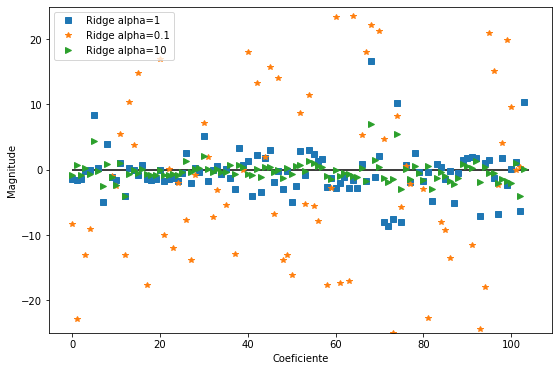

In [11]:
plt.figure(figsize=(9,6))

plt.plot(ridge1.coef_,'s', label="Ridge alpha=1")
plt.plot(ridge01.coef_,'*', label="Ridge alpha=0.1")
plt.plot(ridge10.coef_,'>', label="Ridge alpha=10")


plt.xlabel("Coeficiente")
plt.ylabel("Magnitude")
plt.hlines(0, 0, len(linreg.coef_))
plt.ylim(-25,25)

plt.legend()



### Comparação de Lasso com Regressão Linear

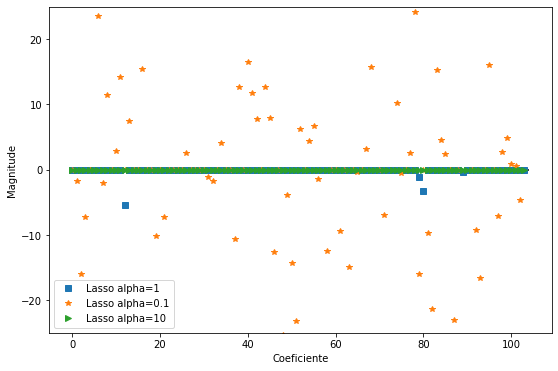

In [12]:
plt.figure(figsize=(9,6))


plt.plot(lasso1.coef_,'s', label="Lasso alpha=1")
plt.plot(lasso01.coef_,'*', label="Lasso alpha=0.1")
plt.plot(lasso10.coef_,'>', label="Lasso alpha=10")

plt.xlabel("Coeficiente")
plt.ylabel("Magnitude")
plt.hlines(0, 0, len(linreg.coef_))
plt.ylim(-25,25)

plt.legend()
